### Cho dữ liệu skin nằm trong tập tin Skin_NonSkin.txt.
* Bộ dữ liệu phân loại da (Skin Segmentation) được tạo thành từ 3 không gian màu B, G, R. Dữ liệu Skin và Nonskin được tạo ra bằng cách sử dụng kết cấu da từ hình ảnh khuôn mặt với sự đa dạng về độ tuổi, giới tính,...
#### Có (245057 * 4) sample với 3 cột đầu là B,G,R (x1,x2, và x3 features), cột thứ tư là class labels (y).
### Áp dụng thuật toán PCA để trực quan hóa dữ liệu với 2 thành phần thay vì 3 thành phần.

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("../../Data/Skin_NonSkin.txt", sep='\t', header= None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       245057 non-null  int64
 1   1       245057 non-null  int64
 2   2       245057 non-null  int64
 3   3       245057 non-null  int64
dtypes: int64(4)
memory usage: 7.5 MB


In [3]:
data.head(3)

,0,1,2,3
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1


In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

## Trực quan hóa dữ liệu

In [5]:
X.head(3)

,0,1,2
0,74,85,123
1,73,84,122
2,72,83,121


In [6]:
X = X.astype('float')

In [7]:
X = StandardScaler().fit_transform(X)

In [8]:
X = pd.DataFrame(data = X, columns = [0, 1, 2])
X.head(3)

,0,1,2
0,-0.820256,-0.792567,-0.002441
1,-0.836318,-0.809250,-0.016223
2,-0.852381,-0.825933,-0.030004


In [9]:
y = np.array(data[3])
y = pd.DataFrame(data = y, columns = ['result'])
y.head(3)

,result
0,1
1,1
2,1


In [10]:
y.groupby(['result']).size()

result
1     50859
2    194198
dtype: int64

In [11]:
pca = PCA(n_components=2)

In [12]:
principalComponents = pca.fit_transform(X)

In [13]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1',
                                                                  'principal component 2'])

In [14]:
principalDf.head(3)

,principal component 1,principal component 2
0,-0.975032,0.583094
1,-1.001979,0.583404
2,-1.028925,0.583714


In [15]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head(3)

,principal component 1,principal component 2,result
0,-0.975032,0.583094,1
1,-1.001979,0.583404,1
2,-1.028925,0.583714,1


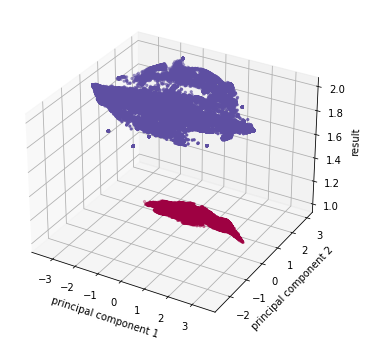

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['result'],
           c=finalDf['result'], marker = '.', cmap=plt.cm.Spectral)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('result')
plt.show()

In [17]:
pca.explained_variance_ratio_

array([0.784023  , 0.17671028])

In [18]:
pca.explained_variance_ratio_.sum()

0.9607332838554207

## Explaining PCA
* The first 2 eigenvectors account for 96% of the variance and will be kept.
* Explaining dataset with 2 main components (PCA)

In [19]:
finalDf = finalDf.join(X)
finalDf.head()

,principal component 1,principal component 2,result,0,1,2
0,-0.975032,0.583094,1,-0.820256,-0.792567,-0.002441
1,-1.001979,0.583404,1,-0.836318,-0.809250,-0.016223
2,-1.028925,0.583714,1,-0.852381,-0.825933,-0.030004
3,-1.082818,0.584334,1,-0.884507,-0.859299,-0.057567
4,-1.082818,0.584334,1,-0.884507,-0.859299,-0.057567


In [20]:
pca.components_

array([[ 0.58484588,  0.62334385,  0.5190354 ],
       [-0.53491085, -0.18464433,  0.82448581]])

In [21]:
vects = pca.components_[:2]

In [22]:
vects

array([[ 0.58484588,  0.62334385,  0.5190354 ],
       [-0.53491085, -0.18464433,  0.82448581]])

2 thanh phan, moi thanh phan co 3 yeu to la 0, 1, 2

## Component one
* High: attribute 1
* Low: attribute 2

In [23]:
one = pd.Series(vects[0], index=X.columns)
one.sort_values(ascending=False)

1    0.623344
0    0.584846
2    0.519035
dtype: float64

## Component two
* High: attribute 2
* Low: attribute 0

In [24]:
two = pd.Series(vects[1], index=X.columns)
two.sort_values(ascending=False)

2    0.824486
1   -0.184644
0   -0.534911
dtype: float64